In [11]:
import pandas as pd
import mlxtend.frequent_patterns.association_rules as association_rules
import mlxtend.frequent_patterns.apriori as apriori
from scipy import sparse

In [12]:
df = pd.read_csv("semua_transaksi_ch11b.csv",parse_dates = ['TRX_TS'], index_col = ['TRX_ID'])
df

,TRX_TS,PRODUCT_ID,PRODUCT_NAME,SALES
TRX_ID,,,,
85,05/31/17 21.14,263,Cappuccino,34000
85,05/31/17 21.14,227,Kopi Tubruk,44000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
85,05/31/17 21.14,268,Macchiato,26000
...,...,...,...,...
8850,08/30/19 19.03,233,Rawon,36000
8851,08/26/19 13.28,236,Nasi Putih,7000
8851,08/30/19 19.03,233,Rawon,36000


In [13]:
df['PRODUCT_NAME'].value_counts().sort_values(ascending=False)

Teh Tubruk                     4677
Mineral Water                  2736
Pisang Goreng                  2206
Nasi Putih                     2016
Nasi Goreng Jawa               1810
Kopi Tubruk                    1799
Soto Ayam                      1758
Extra Kerupuk Putih            1567
Rawon                          1441
Bakmi Godog Keju               1415
Bakmi Goreng Jawa              1184
Fresh Orange Juice             1163
Latte                          1077
Teh Tarik                       957
Roti Bakar                      854
Cappuccino                      811
Macchiato                       634
Hot/Ice Lemon Tea               599
Americano                       506
French Fries                    486
Spaghetti Bolognese             303
Espresso                        111
Macchiato                       100
Iced Tea                         87
Milo Dinosaur                    43
Bakwan Goreng                    32
Double Espresso                  22
Hot Chocolate               

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3976\2103983113.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bar = df.drop(['PRODUCT_ID'],axis=1).groupby('PRODUCT_NAME').sum()


<AxesSubplot: xlabel='PRODUCT_NAME'>

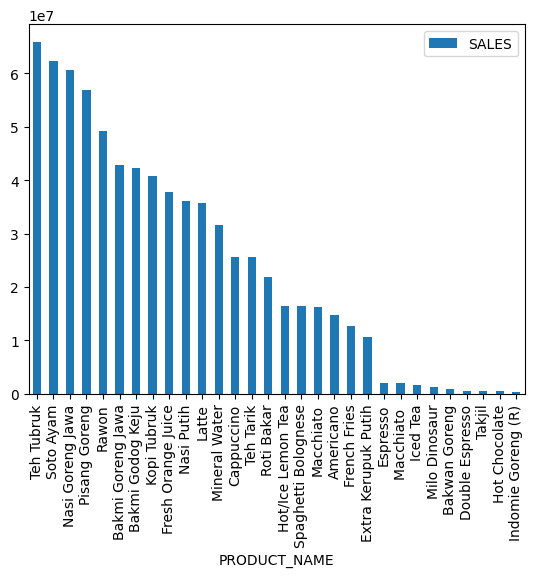

In [14]:
#Visualisasi

df_bar = df.drop(['PRODUCT_ID'],axis=1).groupby('PRODUCT_NAME').sum()

df_bar.sort_values(by=["SALES"],ascending=False).head(30).plot(kind='bar')

In [15]:
df_encode = df.pivot_table(index='TRX_ID',columns='PRODUCT_NAME',values='SALES').fillna(0)
df_encode[df_encode>0] =1


In [16]:
df_encode

PRODUCT_NAME,Americano,Bakmi Godog Keju,Bakmi Goreng Jawa,Bakwan Goreng,Cappuccino,Double Espresso,Es Batu,Es Teh Susu (Gula Jawa),Espresso,Extra Kerupuk Putih,...,Pisang Goreng,Pisang Goreng Tuna Sandwich,Rawon,Roti Bakar,Soto Ayam,Spaghetti Bolognese,Takjil,Teh Tarik,Teh Tubruk,Telur Orak Arik
TRX_ID,,,,,,,,,,,,,,,,,,,,,
85,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_model = sparse.csr_matrix(df_encode.values)

In [22]:
df.shape

(30503, 4)

In [18]:
df_model

<8144x40 sparse matrix of type '<class 'numpy.float64'>'
	with 23117 stored elements in Compressed Sparse Row format>

In [19]:
df_model = apriori(df_encode,min_support=.1,use_colnames=True)
df_model

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.131508,(Bakmi Godog Keju)
1,0.111370,(Bakmi Goreng Jawa)
2,0.129912,(Extra Kerupuk Putih)
3,0.111616,(Fresh Orange Juice)
4,0.177554,(Kopi Tubruk)
5,0.109283,(Latte)
6,0.224705,(Mineral Water)
7,0.170309,(Nasi Goreng Jawa)
8,0.196832,(Nasi Putih)
9,0.206655,(Pisang Goreng)


In [20]:
df_rule = association_rules(df_model,metric='lift',min_threshold=1)
df_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
4,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986
5,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370


In [21]:
df_rule.sort_values(by=['support','confidence','lift'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Pisang Goreng),(Teh Tubruk),0.206655,0.342829,0.122667,0.593583,1.731425,0.051820,1.616986
5,(Teh Tubruk),(Pisang Goreng),0.342829,0.206655,0.122667,0.357808,1.731425,0.051820,1.235370
0,(Nasi Goreng Jawa),(Mineral Water),0.170309,0.224705,0.104003,0.610671,2.717651,0.065734,1.991359
1,(Mineral Water),(Nasi Goreng Jawa),0.224705,0.170309,0.104003,0.462842,2.717651,0.065734,1.544592
3,(Mineral Water),(Teh Tubruk),0.224705,0.342829,0.101793,0.453005,1.321374,0.024757,1.201421
2,(Teh Tubruk),(Mineral Water),0.342829,0.224705,0.101793,0.296920,1.321374,0.024757,1.102712
